In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit
from numba.types import pyobject
import numba
import time
import jit_functions as jf

In [2]:
gammas = np.array([float(10**(2*p)) for p in range(-3,3)])
log_gammas = np.logspace(-3,1.699, 50)

## Potential 3 - 2 modes asymmetric

In [3]:
# making the first asymmetric
@jit(nopython=True)
def potential_3(x):
    return (x-0.9)**4/8 - (x-1)**2/1.2

@jit(nopython=True)
def force_3(x):
    F = -(x-0.9)**3/2 + (x-1)*2/1.2
    return F

obabo_step_3 = jf.make_obabo(force_3)
OBABO_3 = jf.Scheme(obabo_step_3, force_3, potential_3)

baoab_step_3 = jf.make_baoab(force_3)
BAOAB_3 = jf.Scheme(baoab_step_3, force_3, potential_3)

In [ ]:
start_time =time.time()
OBABO_3.avg_convergence_time_graph('obabo3',0.15, jf.square, 2.817515980129208, 0.01, log_gammas[16:40],q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.03422688273698281


In [4]:
true_val = -12.9542/13.0606

In [ ]:
start_time =time.time()
OBABO_3.avg_convergence_time_graph('obabo3_potential',0.15, potential_3, true_val, 0.01, log_gammas,q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.001


Gamma = 0.001
Time Elapsed: 535.7802064418793
Iters = 1010000
Gamma = 0.0012470904663564033
Time Elapsed: 536.6343500614166
Iters = 1010000
Gamma = 0.0015552346312770332
Time Elapsed: 413.09369015693665
Iters = 774515
Gamma = 0.0019395182816129045
Time Elapsed: 305.45860028266907
Iters = 632848
Gamma = 0.0024187547583234097
Time Elapsed: 263.25169014930725
Iters = 560084
Gamma = 0.0030164059995593105
Time Elapsed: 195.83534288406372
Iters = 430514
Gamma = 0.003761731164710674
Time Elapsed: 172.9691560268402
Iters = 385692
Gamma = 0.004691219072506456
Time Elapsed: 121.20582699775696
Iters = 279913
Gamma = 0.0058503745809121354
Time Elapsed: 115.90889263153076
Iters = 246945
Gamma = 0.007295946364469363
Time Elapsed: 97.04534959793091
Iters = 199464
Gamma = 0.009098705154177404
Time Elapsed: 76.6020405292511
Iters = 157948
Gamma = 0.011346908453962521
Time Elapsed: 60.15428042411804
Iters = 129300
Gamma = 0.014150621355555537
Time Elapsed: 45.00275993347168
Iters = 95513
Gamma = 0.01764

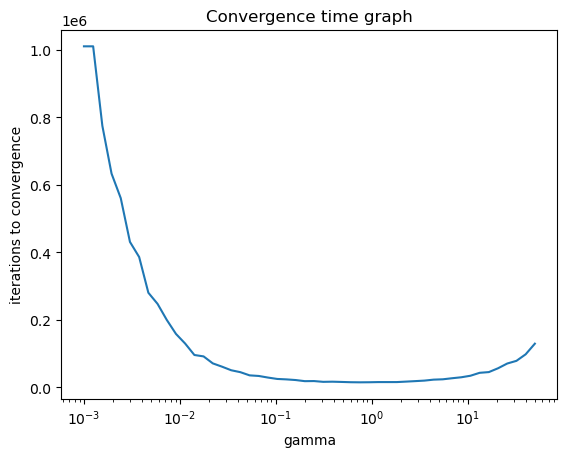

In [11]:
start_time =time.time()
BAOAB_3.avg_convergence_time_graph('baoab3_potential',0.15, potential_3, true_val, 0.01, log_gammas,q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

## 4 modes asymmetric

In [9]:
potential_val = 0.351521/7.731
potential_val

0.04546902082524899

In [11]:
@jit(nopython=True)
def potential_4(x):
    return -np.log( np.exp(-2*(x-1)**2) + 2*np.exp(-3*(x+1.1)**2) + 1.5*np.exp(-(x+3)**2) + np.exp(-(x-3)**2) )

@jit(nopython=True)
def force_4(x):
    r = -4*(x-1)*np.exp(-2*(x-1)**2)  -2*6*(x+1.1)*np.exp(-3*(x+1.1)**2)  -1.5*2*(x+3)*np.exp(-(x+3)**2) -2*(x-3)*np.exp(-(x-3)**2)
    F = r/(np.exp(-2*(x-1)**2) + 2*np.exp(-3*(x+1.1)**2) + 1.5*np.exp(-(x+3)**2) + np.exp(-(x-3)**2))
    return F

obabo_step_4 = jf.make_obabo(force_4)
OBABO_4 = jf.Scheme(obabo_step_4, force_4, potential_4)

baoab_step_4 = jf.make_baoab(force_4)
BAOAB_4 = jf.Scheme(baoab_step_4, force_4, potential_4)

Time Elapsed: 116.2400324344635


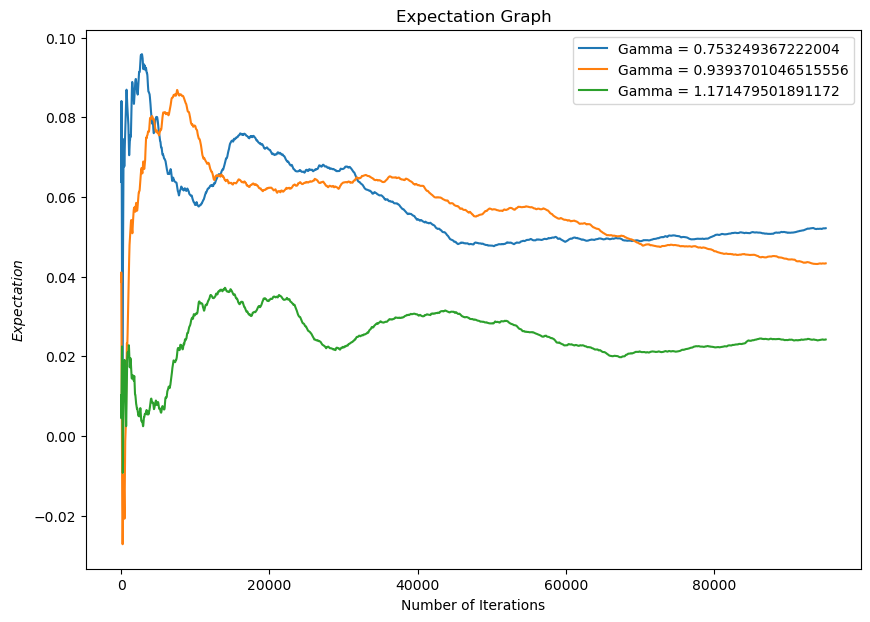

In [8]:
start_time =time.time()
OBABO_4.expectation_graph(potential_4,100000, 0.01, 100, log_gammas[30:33], q_init = np.random.normal(size =100), p_init = np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.001
Time Elapsed: 431.6880464553833
Iters = 1010000
Gamma = 0.0012470904663564033
Time Elapsed: 387.94682931900024
Iters = 1010000
Gamma = 0.0015552346312770332
Time Elapsed: 356.7450325489044
Iters = 925742
Gamma = 0.0019395182816129045
Time Elapsed: 295.4753906726837
Iters = 766447
Gamma = 0.0024187547583234097
Time Elapsed: 245.50628542900085
Iters = 641515
Gamma = 0.0030164059995593105
Time Elapsed: 189.86206436157227
Iters = 490759
Gamma = 0.003761731164710674
Time Elapsed: 222.61193919181824
Iters = 421848
Gamma = 0.004691219072506456
Time Elapsed: 196.6581165790558
Iters = 314882
Gamma = 0.0058503745809121354
Time Elapsed: 109.17800951004028
Iters = 263879
Gamma = 0.007295946364469363
Time Elapsed: 109.10889387130737
Iters = 209343
Gamma = 0.009098705154177404
Time Elapsed: 97.4799234867096
Iters = 172288
Gamma = 0.011346908453962521
Time Elapsed: 62.41296863555908
Iters = 157264
Gamma = 0.014150621355555537
Time Elapsed: 47.75468182563782
Iters = 118524
Gamma = 0.0176

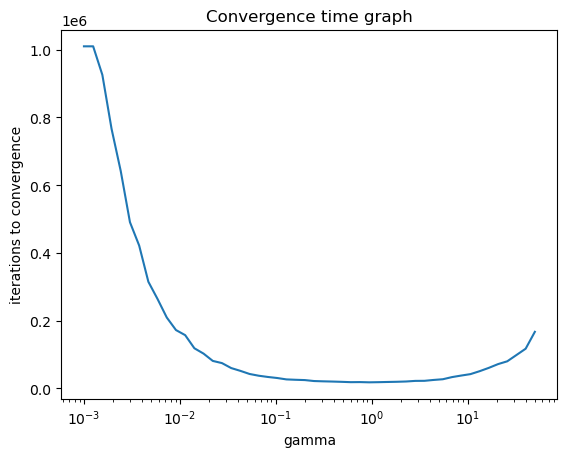

In [13]:
start_time =time.time()
OBABO_4.avg_convergence_time_graph("obabo4_potential",0.15, potential_4, potential_val, 0.01, log_gammas,q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.001
Time Elapsed: 499.2980513572693
Iters = 1010000
Gamma = 0.0012470904663564033
Time Elapsed: 491.80588126182556
Iters = 1010000
Gamma = 0.0015552346312770332
Time Elapsed: 442.0731418132782
Iters = 909687
Gamma = 0.0019395182816129045
Time Elapsed: 372.185174703598
Iters = 773543
Gamma = 0.0024187547583234097
Time Elapsed: 363.3555157184601
Iters = 617071
Gamma = 0.0030164059995593105
Time Elapsed: 175.48819375038147
Iters = 479937
Gamma = 0.003761731164710674
Time Elapsed: 147.87740898132324
Iters = 394164
Gamma = 0.004691219072506456
Time Elapsed: 127.54707336425781
Iters = 350410
Gamma = 0.0058503745809121354
Time Elapsed: 89.86442565917969
Iters = 248568
Gamma = 0.007295946364469363
Time Elapsed: 86.68464159965515
Iters = 236687
Gamma = 0.009098705154177404
Time Elapsed: 66.02558302879333
Iters = 182811
Gamma = 0.011346908453962521
Time Elapsed: 53.21718621253967
Iters = 147188
Gamma = 0.014150621355555537
Time Elapsed: 46.24736714363098
Iters = 123047
Gamma = 0.017647

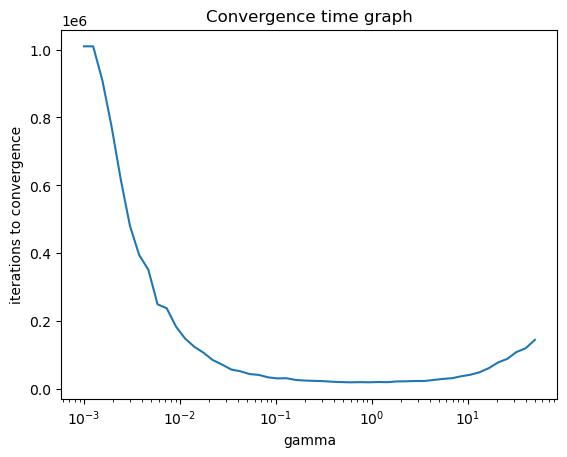

In [15]:
start_time =time.time()
BAOAB_4.avg_convergence_time_graph("baoab4_potential",0.15, potential_4, potential_val, 0.01, log_gammas,q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [23]:
@jit(nopython=True)
def potential_uni(x):
    return x**2 /2

@jit(nopython=True)
def force_uni(x):
    return -x

obabo_step_1 = jf.make_obabo(force_uni)
OBABO_1 = jf.Scheme(obabo_step_1, force_uni, potential_uni)

baoab_step_1 = jf.make_baoab(force_uni)
BAOAB_1 = jf.Scheme(baoab_step_1, force_uni, potential_uni)

Time Elapsed: 37.48489999771118


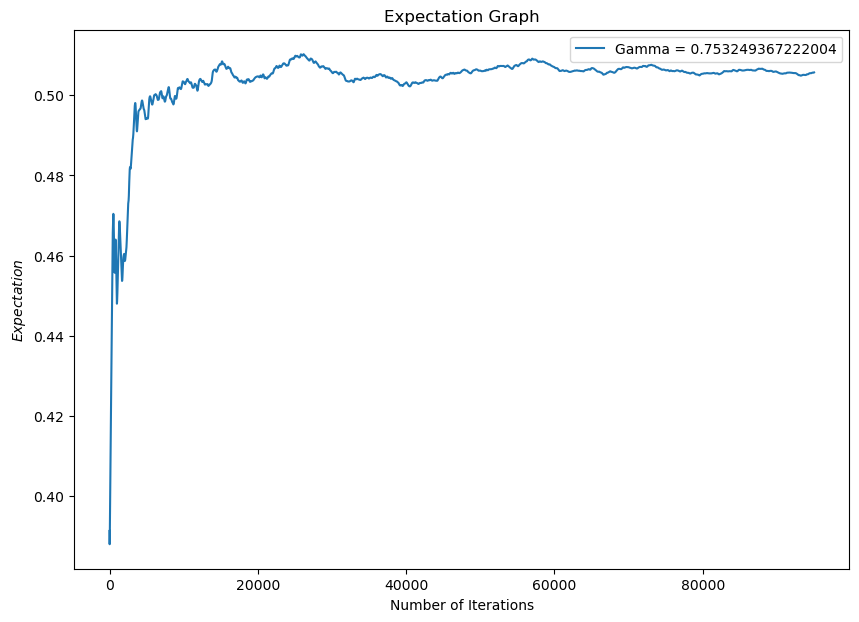

In [25]:
start_time =time.time()
OBABO_1.expectation_graph(potential_uni,100000, 0.01, 100, log_gammas[30:31], q_init = np.zeros(100), p_init = np.zeros(100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.001
Time Elapsed: 448.47179794311523
Iters = 1010000
Gamma = 0.0012470904663564033
Time Elapsed: 498.0336661338806
Iters = 958362
Gamma = 0.0015552346312770332
Time Elapsed: 695.3278391361237
Iters = 768021
Gamma = 0.0019395182816129045
Time Elapsed: 408.2264804840088
Iters = 623232
Gamma = 0.0024187547583234097
Time Elapsed: 365.8290755748749
Iters = 529945
Gamma = 0.0030164059995593105
Time Elapsed: 244.75604891777039
Iters = 402782
Gamma = 0.003761731164710674
Time Elapsed: 158.41055560112
Iters = 343083
Gamma = 0.004691219072506456
Time Elapsed: 114.73136758804321
Iters = 243583
Gamma = 0.0058503745809121354
Time Elapsed: 103.90912461280823
Iters = 215795
Gamma = 0.007295946364469363
Time Elapsed: 97.36030411720276
Iters = 207368
Gamma = 0.009098705154177404
Time Elapsed: 63.90755748748779
Iters = 140826
Gamma = 0.011346908453962521
Time Elapsed: 54.96394920349121
Iters = 121419
Gamma = 0.014150621355555537
Time Elapsed: 46.934311866760254
Iters = 98601
Gamma = 0.01764710

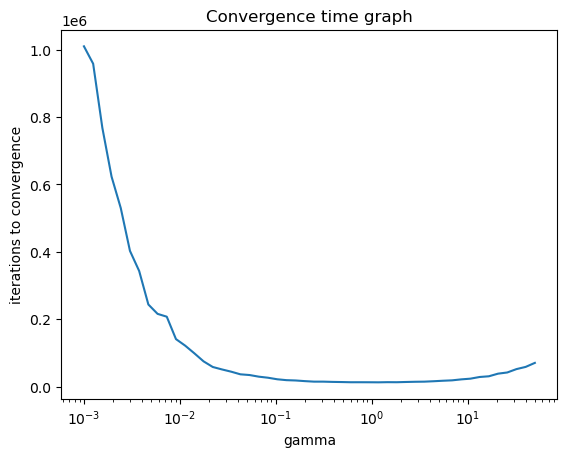

In [26]:
start_time =time.time()
BAOAB_1.avg_convergence_time_graph("baoab_unimodal",0.15, potential_uni, 0.5, 0.01, log_gammas,q_init = np.zeros(1000), p_init =np.zeros(1000))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.001
Time Elapsed: 253.700031042099
Iters = 1010000
Gamma = 0.0012470904663564033
Time Elapsed: 222.4555299282074
Iters = 909698
Gamma = 0.0015552346312770332
Time Elapsed: 190.57809615135193
Iters = 786771
Gamma = 0.0019395182816129045
Time Elapsed: 150.28361010551453
Iters = 622121
Gamma = 0.0024187547583234097
Time Elapsed: 122.68092131614685
Iters = 510942
Gamma = 0.0030164059995593105
Time Elapsed: 102.64480304718018
Iters = 418612
Gamma = 0.003761731164710674
Time Elapsed: 71.65104079246521
Iters = 279283
Gamma = 0.004691219072506456
Time Elapsed: 65.13310527801514
Iters = 267860
Gamma = 0.0058503745809121354
Time Elapsed: 47.85093569755554
Iters = 198421
Gamma = 0.007295946364469363
Time Elapsed: 37.71393799781799
Iters = 159753
Gamma = 0.009098705154177404
Time Elapsed: 37.84254431724548
Iters = 150946
Gamma = 0.011346908453962521
Time Elapsed: 30.19890260696411
Iters = 117125
Gamma = 0.014150621355555537
Time Elapsed: 24.872740030288696
Iters = 87057
Gamma = 0.0176471

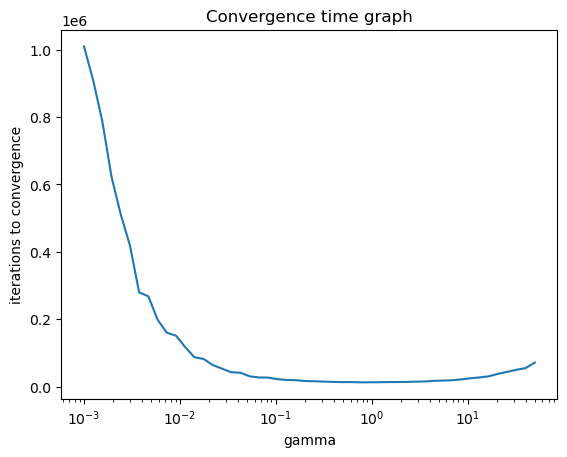

In [27]:
start_time =time.time()
OBABO_1.avg_convergence_time_graph("obabo_unimodal",0.15, potential_uni, 0.5, 0.01, log_gammas,q_init = np.zeros(1000), p_init =np.zeros(1000))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")